$\textbf{*** This version uses the }\texttt{Dataloader, Asset, Portfolio}\textbf{ classes to load data}$

In [20]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys
import importlib
sys.path.append('../')
from IPython.display import display, Math, Latex
# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.entropy_features.entropy_features import EntropyFeatures

In [22]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data File

In [23]:
# Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col='DATE',
                        keep_cols=['VOLUME', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'TRANSACTIONS'])

entropyfeatures = EntropyFeatures()

Here we will select $N=15,000$ ticks from our database for simplicity. We also select the equity $\textbf{TSLA}-Apple$ from  the data available.

In [24]:
# Example Files
fname_RUBEUR = 'FX/RUBEUR_2020-04-07_2022-04-06.parquet'
fname_USDBRL = 'FX/USDBRL_2020-04-07_2022-04-06.parquet'
fname_AAPL = 'equities/AAPL_2020-04-07_2022-04-06.parquet'
fname_TSLA = 'equities/TSLA_2020-04-07_2022-04-06.parquet'

# No. of Records from example dataset
N = 15000

In [25]:
# Dataset chosen in this simulation
ticker = 'RUBEUR'
fname = fname_RUBEUR

In [26]:
# loading assets into to an unique df
df = dataloader.load_dataset({ticker: '../data/' + fname})#.iloc[:N]
display(df)

,RUBEUR_VOLUME,RUBEUR_OPEN,RUBEUR_HIGHT,RUBEUR_LOW,RUBEUR_CLOSE,RUBEUR_VW,RUBEUR_TRANSACTIONS
DATE,,,,,,,
2020-04-07 19:07:00,1,0.012170,0.012170,0.012170,0.012170,0.0122,1
2020-04-07 19:10:00,1,0.012170,0.012170,0.012170,0.012170,0.0122,1
2020-04-07 19:11:00,2,0.012170,0.012170,0.012170,0.012170,0.0122,2
2020-04-07 19:14:00,2,0.012180,0.012180,0.012170,0.012170,0.0122,2
2020-04-07 19:15:00,2,0.012170,0.012170,0.012170,0.012170,0.0122,2
...,...,...,...,...,...,...,...
2021-10-20 23:59:00,2,0.012115,0.012115,0.012111,0.012111,0.0121,2
2022-04-05 11:05:00,1,0.010611,0.010611,0.010611,0.010611,0.0106,1
2022-04-05 21:00:00,1,0.010611,0.010611,0.010611,0.010611,0.0106,1


In [27]:


# Example usage:
# Assuming 'financial_data' is a pandas DataFrame with various features
# Make sure to preprocess your data accordingly (handle missing values, etc.)
# You can replace 'financial_data' with your actual financial dataset
plugin_entropy_values = entropyfeatures.plugin_entropy_estimator(df)
plugin_entropy_values = dict(sorted(plugin_entropy_values.items(), key=lambda item: item[1]))
# Display the calculated entropies for each feature
for feature, entropy_value in plugin_entropy_values.items():
    print(f"{feature}: {entropy_value}")

RUBEUR_VOLUME: 1.8614150163882377
RUBEUR_TRANSACTIONS: 1.8614150163882377
RUBEUR_HIGHT: 2.659000458037651
RUBEUR_CLOSE: 2.6594116538386467
RUBEUR_OPEN: 2.668433087956592
RUBEUR_LOW: 2.6794209342263136
RUBEUR_VW: 2.6954622498359937


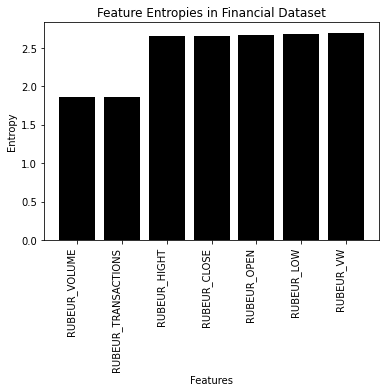

In [28]:
import matplotlib.pyplot as plt

# Visualize the entropies using a bar plot
plt.bar(plugin_entropy_values.keys(), plugin_entropy_values.values(), color='black')
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.title('Feature Entropies in Financial Dataset')
plt.xticks(rotation=90, ha='right')
plt.show()

In [29]:


# Example usage:
# Assuming 'financial_data' is a pandas DataFrame with various features
# Make sure to preprocess your data accordingly (handle missing values, etc.)
lempel_ziv_values = entropyfeatures.lempel_ziv_estimator(df)
lempel_ziv_values = dict(sorted(lempel_ziv_values.items(), key=lambda item: item[1]))
# Display the calculated entropies for each feature
for feature, entropy_value in lempel_ziv_values.items():
    print(f"{feature}: {entropy_value}")

RUBEUR_VOLUME: 24
RUBEUR_TRANSACTIONS: 24
RUBEUR_VW: 43
RUBEUR_OPEN: 49
RUBEUR_HIGHT: 49
RUBEUR_LOW: 49
RUBEUR_CLOSE: 49


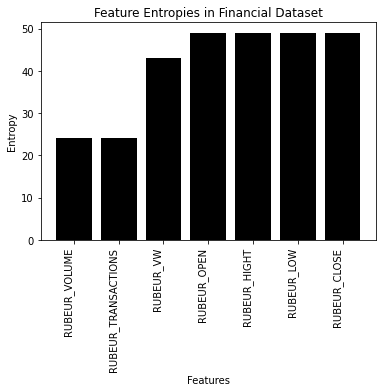

In [30]:
# Visualize the entropies using a bar plot
plt.bar(lempel_ziv_values.keys(), lempel_ziv_values.values(), color='black')
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.title('Feature Entropies in Financial Dataset')
plt.xticks(rotation=90, ha='right')
plt.show()

In [31]:
#Example 1: Entropy Features Calculation
import pandas as pd
import numpy as np
from scipy.stats import entropy


# Calculate entropy for each column
entropy_feats = {}
for column in df.columns:
    values = df[column].values
    entropy_value = entropy(np.histogram(values, bins='auto')[0])
    entropy_feats[column] = entropy_value

# Display entropy values for each column
print("Entropy Features:")
for column, entropy_value in entropy_feats.items():
    print(f"{column}: {entropy_value}")

Entropy Features:
RUBEUR_VOLUME: 3.7139943098865125
RUBEUR_OPEN: 4.458178912782003
RUBEUR_HIGHT: 4.455597972776609
RUBEUR_LOW: 4.4571994378687005
RUBEUR_CLOSE: 4.456272231264956
RUBEUR_VW: 2.851993856294041
RUBEUR_TRANSACTIONS: 3.7139943098865125


In [32]:
#Example 2: Entropy Estimation
from sklearn.feature_selection import mutual_info_regression


# Extract features and target variable
X = df.drop(['RUBEUR_CLOSE'], axis=1)  # Assuming 'Close' is the target variable
y = df['RUBEUR_CLOSE']

# Calculate mutual information between each feature and the target variable
mutual_info = {}
for column in X.columns:
    mutual_info[column] = mutual_info_regression(X[[column]], y)[0]
mutual_info = dict(sorted(mutual_info.items(), key=lambda item: item[1]))
# Display mutual information values for each feature
print("Mutual Information with Target (Close):")
for column, mi_value in mutual_info.items():
    print(f"{column}: {mi_value}")

Mutual Information with Target (Close):
RUBEUR_VOLUME: 0.2843841777363001
RUBEUR_TRANSACTIONS: 0.2851398502072149
RUBEUR_VW: 2.805640092856787
RUBEUR_OPEN: 5.271363076355284
RUBEUR_HIGHT: 5.798414975774971
RUBEUR_LOW: 5.918698478488368


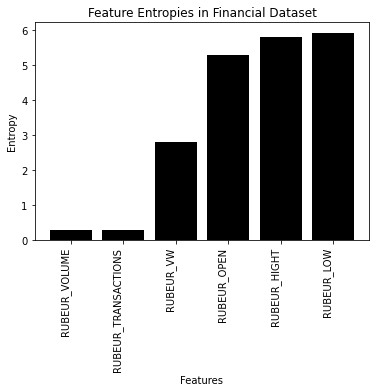

In [33]:
# Visualize the entropies using a bar plot
plt.bar(mutual_info.keys(), mutual_info.values(), color='black')
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.title('Feature Entropies in Financial Dataset')
plt.xticks(rotation=90, ha='right')
plt.show()